# Loan Approval Prediction

#### **This repo contains the Loan Approval Prediction project completed as part of the online hackathon organized by Analytics Vidhya. Evaluation metric of the hackathon is accuracy, i.e. percentage of loan approval that is correctly predicted. Logistic Regression, Decision Trees, Random Forests, Gradient Boosting and K Nearest Neighbors was used.**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bank-loan2/madhante.csv
/kaggle/input/bank-loan2/madfhantr.csv
/kaggle/input/bank-loan2/sample_submission_49d68Cx.csv
/kaggle/input/loan-prediction-dataset/test.csv
/kaggle/input/loan-prediction-dataset/train.csv


In [2]:
# load the train and test dataset
train = pd.read_csv("/kaggle/input/loan-prediction-dataset/train.csv")
test = pd.read_csv("/kaggle/input/loan-prediction-dataset/test.csv")

## **Exploratory Data Analysis - EDA**

In [3]:
# make a copy of original data
# so that even if we have to make any changes in these datasets we would not lose the original datasets

train_original = train.copy()
test_original = test.copy()

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#No. of rows and columns of train data
train.shape

(614, 13)

In [6]:
#No. of rows and columns of test data
test.shape

(367, 12)

In [7]:
train.columns
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:

#getting to know the data types
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
#now percentage distribution
train.Loan_Status.value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

#### **Since the ratio of Y and N is 0.69:0.31, the data is not skewed, and we can use accuracy metric to evaluate model**

#### **There are 5 categorical features, we will visualise them**

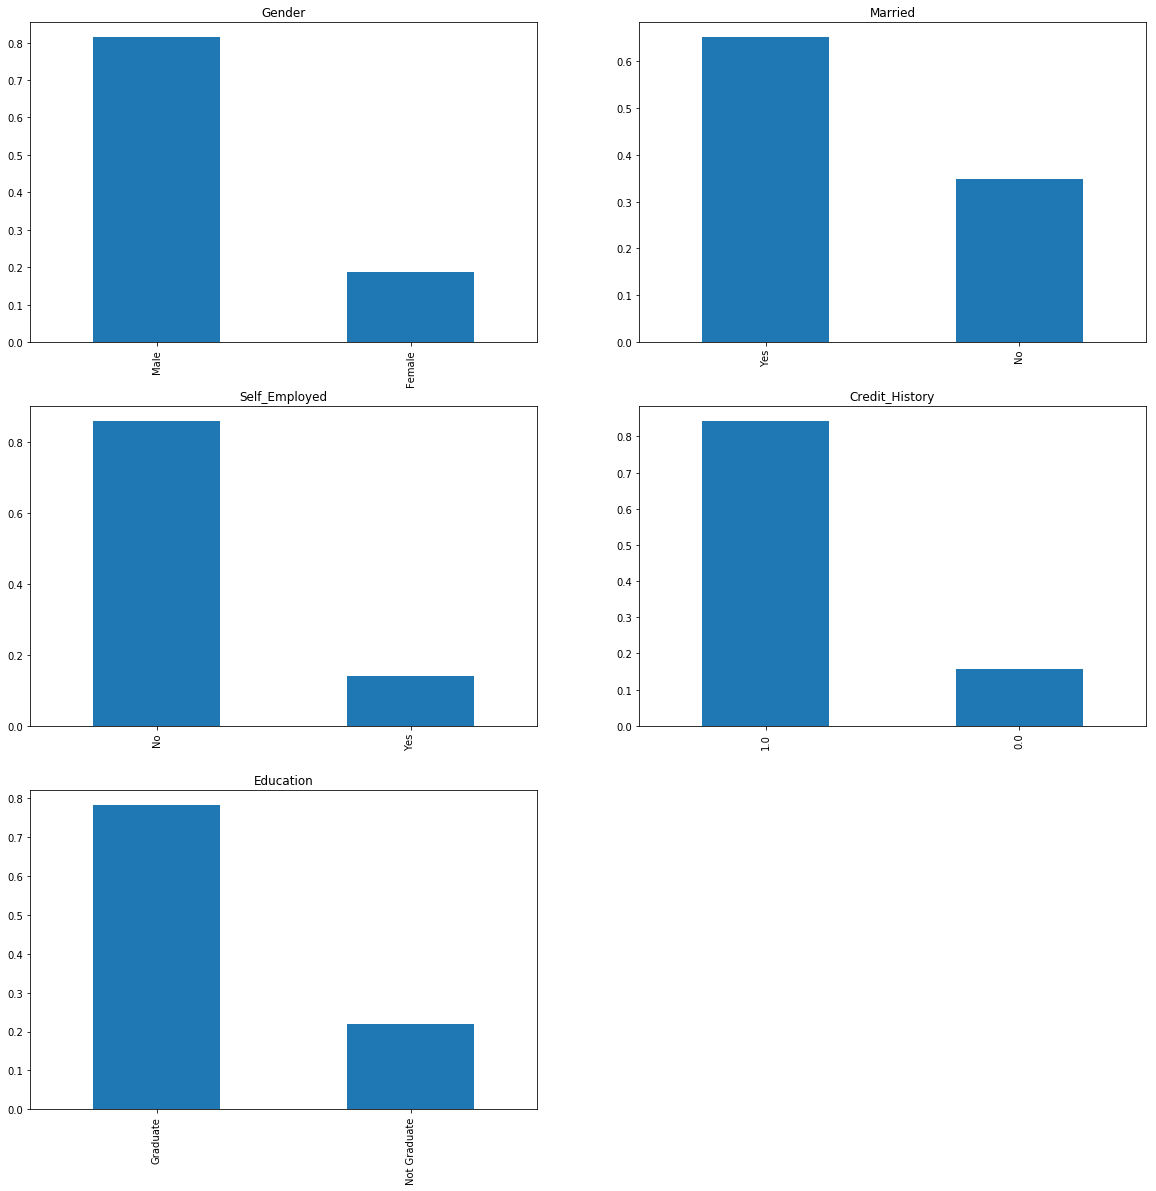

In [11]:
plt.subplot(321)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,20), title= 'Gender')

plt.subplot(322)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(323)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(324)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(325)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

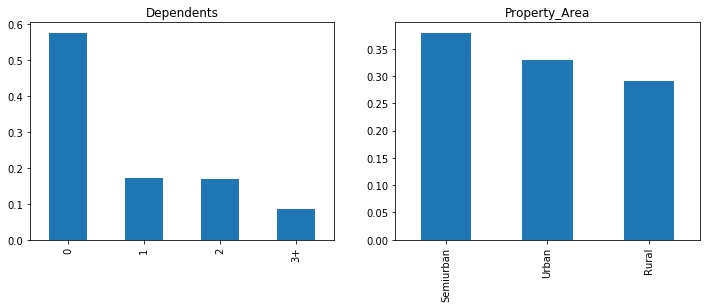

In [12]:
#Categorical variables having multiple values
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

#### **Now, we will visualise numerical variables - ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term**

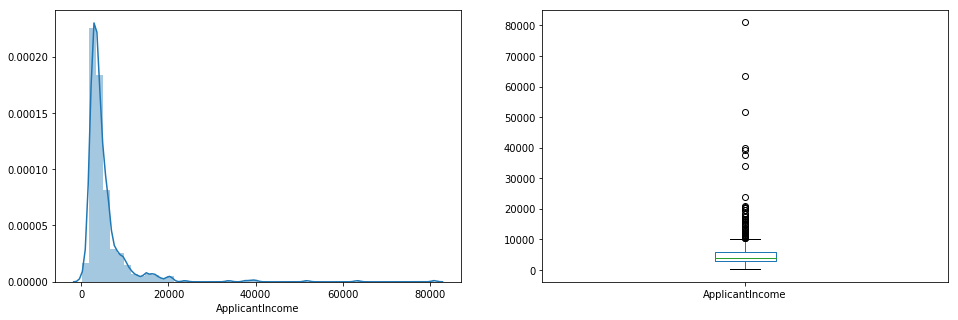

In [13]:
#Applicant income
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

#### **From the histogram, we see that the data is right-skewed and is not normally distributed. Boxplot confirms the presence of lot of outliers. This is due to educational disparity**

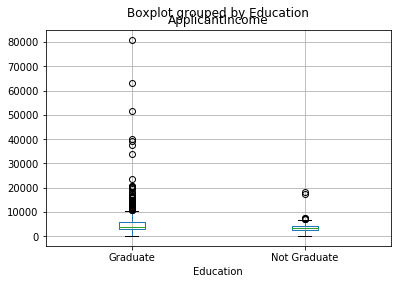

In [14]:
train.boxplot(column='ApplicantIncome', by = 'Education')

#### **We can see that graduates have higher incomes**

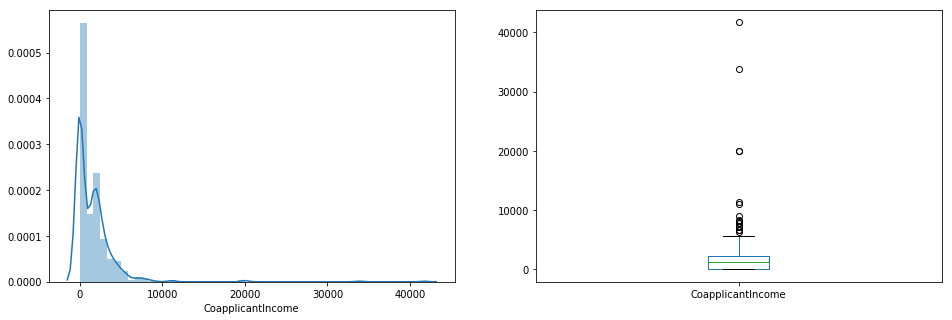

In [15]:
# Coapplicant income
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

#### **Again, we see a similar distribution to applicant income, and a lot of outliers**

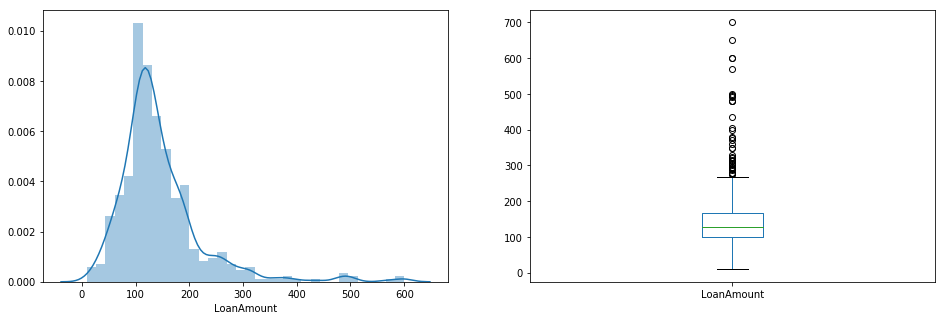

In [16]:
#loan_amount
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()


#### A less skewed and more normally distributed curve for loan amount variable, but still a lot of outliers

In [17]:
#Loan_Amount_Term - we will use frequency table since variable is discreet
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

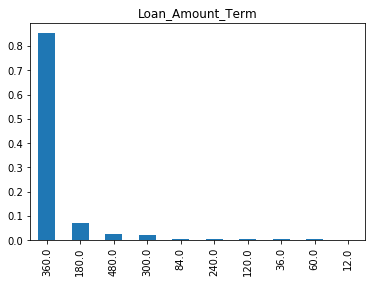

In [18]:
#bar chart
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

#### Majority - around 85% loans are 360 months old

### **Categorical Variable vs Target Variable**
#### We will explore the relation between various categorical variables and the target variable, loan_status. 

#### **Gender**

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


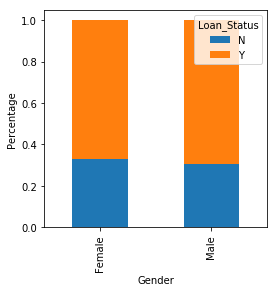

In [19]:
# Stacked bar plot
print(pd.crosstab(train['Gender'],train['Loan_Status']))

Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

#### **Married**

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


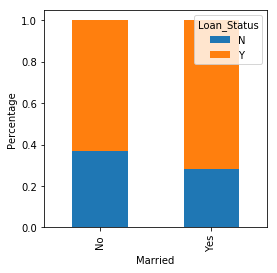

In [20]:
print(pd.crosstab(train['Married'],train['Loan_Status']))

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

#### **Dependents**

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


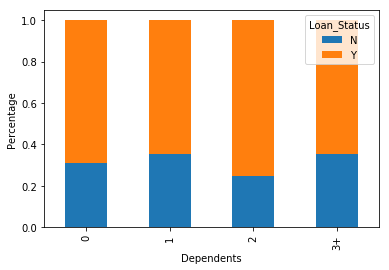

In [21]:
print(pd.crosstab(train['Dependents'],train['Loan_Status']))

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

#### **Education**

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


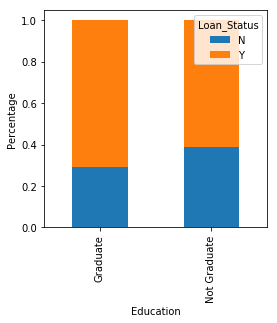

In [22]:
print(pd.crosstab(train['Education'],train['Loan_Status']))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

#### **Self_Employed**

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


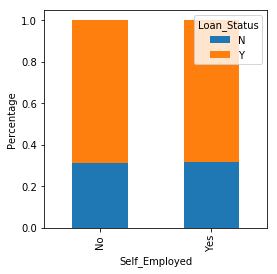

In [23]:
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

#### **Credit History**

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


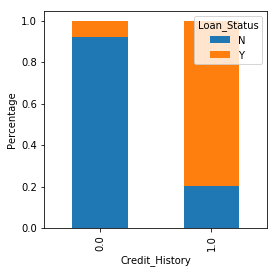

In [24]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

#### **Property_Area**

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


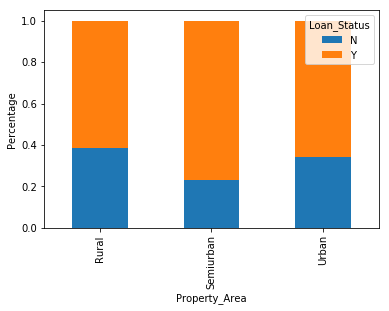

In [25]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

#### Inferences from the graphs - 
* Gender has very little effect on approval of loan
* Married applicants have higher chances for approval of loans
* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
* Graduates have higher probability for loan approval.
* Nothing significant for self_employed vs loan_status
* People with credit history of 1 have significantly higher loan approval compared to people with credit history 0
* Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas
 


### **Numerical Variables vs Target Variable**

#### **Applicant Income**

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


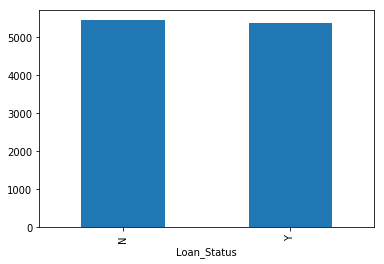

In [26]:
print(train.groupby('Loan_Status').ApplicantIncome.mean())

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

#### No significant difference in the income of approved and non approved applicants
####    We will make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin

In [27]:
train.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [28]:
# making bins for applicant income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

In [29]:
#Looking at updated train data
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,High
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,Very high


Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


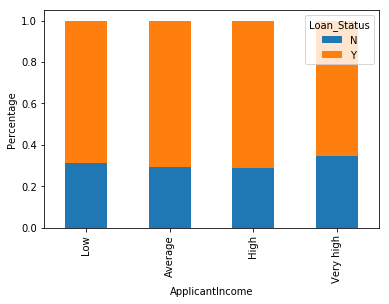

In [30]:
#Stacked plot
print(pd.crosstab(train['Income_bin'],train['Loan_Status']))

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

#### Surprisingly, it is seen that applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.
#### We will analyse coapplicant income in a similar manner

#### **Coapplicant Income**

In [31]:
train.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [32]:
# making bins for Coapplicant income variable
bins = [0,1000,2500,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

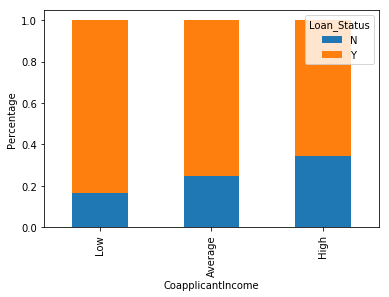

In [33]:
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [34]:
print(len(train[train["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is:",  len(train[train["CoapplicantIncome"] == 0])/len(train["CoapplicantIncome"])

273


('Percentage of CoapplicantIncome = 0 is:', 0.44462540716612375)

#### This shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. It may be that most of the applicants don’t have any coapplicant, so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

#### Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [35]:
# create a new variable by adding applicant and coapplicant income
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [36]:
train['Total_Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64

In [37]:
# making bins for Total Income variable
bins = [0,2500,5000,7000,81000]
group = ['Low','Average','High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

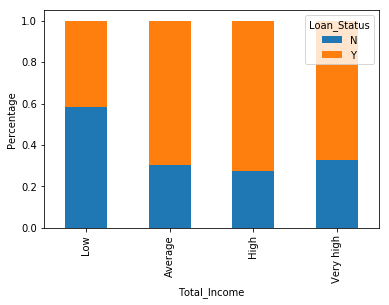

In [38]:
# Stacked plot
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

#### We can see that proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income. This is more consistent with our hypothesis that applicants with high income will have more chances of loan approval.


#### **Loan Amount**

In [39]:
train.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [40]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

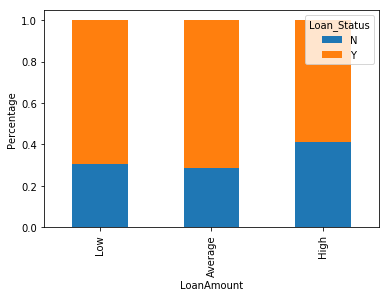

In [41]:
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

#### Proportion of loans getting approved is lower for high loan amounts and is larger for low and average loan amounts

#### We will now drop the newly created features (bins)

In [42]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [43]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### We will change 3+ in the dependents feature to 3 in order to make it a numerical variable. We will also change the Y and N in Loan_Status to 1 and 0.

In [44]:
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

In [45]:
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [46]:
train.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,1
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,0
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,1
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,1
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,1
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0


#### We will visualise the correlation matrix and the corresponding heatmap, using Pearson's correlation metric.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


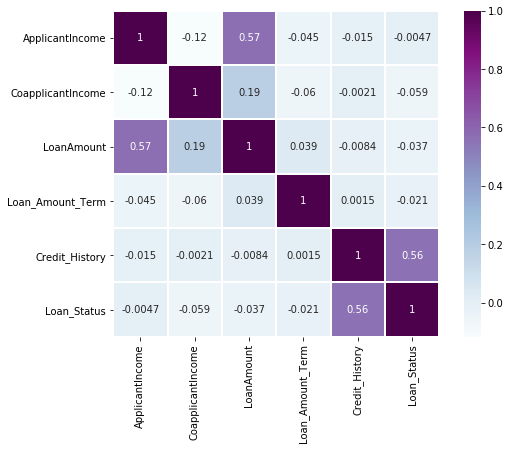

In [47]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu",linewidths=1, annot=True)

matrix

#### We see that the most correlated variables are

* (ApplicantIncome - LoanAmount) with correlation coefficient of 0.57
* (Credit_History - Loan_Status) with correlation coefficient of 0.56
* LoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19.

## **Data Preprocessing**

### **Missing Values**

In [48]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, LoanAmount Term and Credit History. We can treat the numerical variables by imputing with the mean or median. For categorical variables, we can imput with the mode. We won't drop any feature, since the number of missing values are not that many.

In [49]:
#Categorical variables - replace missing values with mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [50]:
#Loan_Amount_Term
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

#### The value of 360.0 occurs the most (almost 80% of the time), so we will replace the missing values with this value, i.e the mode

In [51]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [52]:
#We will use median since this variable has a lot of outliers
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [53]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### All the missing values have been filled

#### We will follow a similar approach for test data. But we need to replace the missing values in Test set using the mode/median/mean of the Training set, not from the Test set to avoid data leakage to the test set 

In [54]:
# replace missing values in Test set with mode/median from Training set
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

### **Outliers**

#### As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data.To remove the skewness we will take the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

#### Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

Text(0.5, 1.0, 'Test')

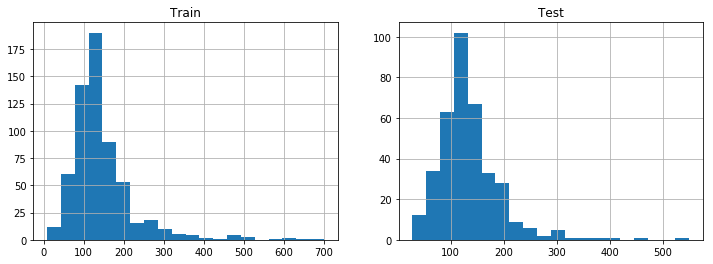

In [55]:
# before log transformation

ax1 = plt.subplot(121)
train['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount'].hist(bins=20)
ax2.set_title("Test")

#### The graphs are right-skewed and have a lot of outliers. Let's take log transformation of the Loan Amount variable

In [56]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Text(0.5, 1.0, 'Test')

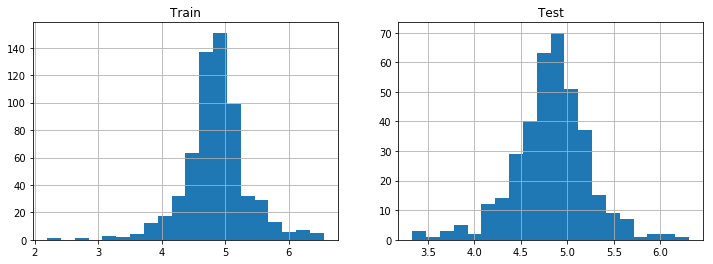

In [57]:
# after log transformation

ax1 = plt.subplot(121)
train['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount_log'].hist(bins=20)
ax2.set_title("Test")

#### The model now looks pretty normal and effect of extreme values has been reduced. 

## **Model Development and Evaluation**

### **Logistic Regression**

In [58]:
# drop Loan_ID since it has no effect on loan_status
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

#### We will drop the target variable from train dataset and save it to another dataset

In [59]:
# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [60]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.85203
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.85203


In [61]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

#### We will now make dummy variables for the categorical variables since logistic regression only accepts numerical variables

In [62]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [63]:
X.shape, train.shape, test.shape

((614, 21), (614, 22), (367, 21))

In [64]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


#### Let's split train data into train and validation data

In [65]:
from sklearn import model_selection

# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((429, 21), (185, 21), (429,), (185,))

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [68]:
# fit the model
model = LogisticRegression(C = 0.5)
model.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Let us predict on validation data

In [69]:
pred_cv = model.predict(x_cv)

In [70]:
# calculate accuracy score
accuracy_score(y_cv, pred_cv)

0.8216216216216217

#### Let's evaluate model using confusion matrix

[[ 22  29]
 [  4 130]]


Text(33.0, 0.5, 'True')

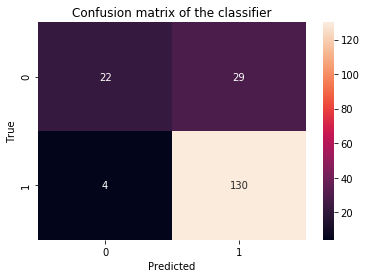

In [71]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_cv)
print(cm)

sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

              precision    recall  f1-score   support

           0       0.85      0.43      0.57        51
           1       0.82      0.97      0.89       134

    accuracy                           0.82       185
   macro avg       0.83      0.70      0.73       185
weighted avg       0.83      0.82      0.80       185



#### Our model has an accuracy of 83%, precision 82% and recall 97%

In [73]:
# make prediction on test set
pred_test = model.predict(test)

In [74]:
#take a look at prediction
pred_test[:50]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

#### Modifying sample submission file in order to submit

In [75]:
submission = pd.read_csv('../input/bank-loan2/sample_submission_49d68Cx.csv')

In [76]:
# fill the Loan_ID and Loan_Status
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [77]:
# replace with "N" and "Y"
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [78]:
# take a look at the submission result
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [79]:
# convert to CSV file, without row index
submission.to_csv("loan.csv", index=False)

#### Accuracy on test data - 0.78

#### We will also implement cross-validation to evaluate our model

### K-fold Validation

In [80]:
from sklearn.model_selection import StratifiedKFold

In [81]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(test)

pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147

Mean validation accuracy:  0.8012928162068507


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Visualising ROC and calculating AUC

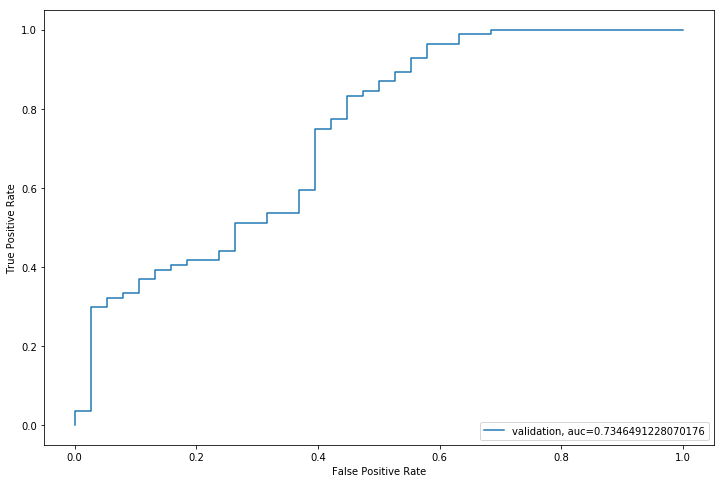

In [82]:
# visualize ROC curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [83]:
#submission
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [84]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [85]:
submission.to_csv('logistic.csv', index=False)

#### We got an accuracy of 0.764

## **Feature Engineering**

#### With the help of previously done analysis, we can come up with some new features to improve our predictions
* **Total Income** - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
* **EMI** - EMI is the monthly amount to be paid by the applicant to repay the loan. People who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
* **Balance Income** - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [86]:
# combine Applicant Income and Coapplicant Income into a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

Text(0.5, 1.0, 'Test')

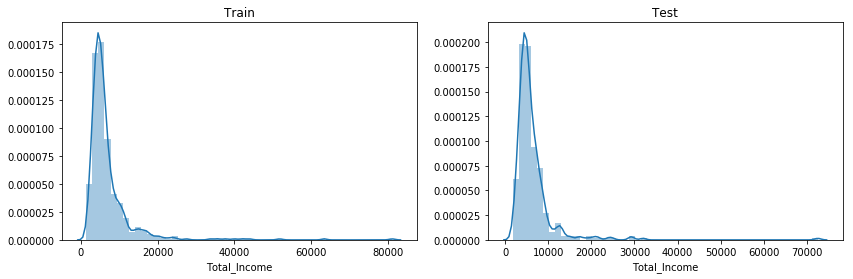

In [87]:
# check the distribution of Total Income


fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income'])
 
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income'])
ax1.set_title("Test")

In [88]:
# log transformation
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

Text(0.5, 1.0, 'Test')

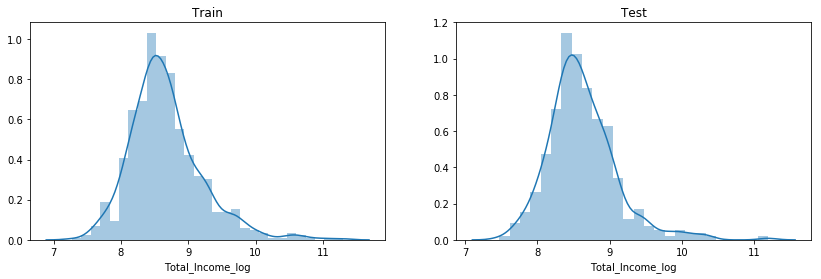

In [89]:
# after log transformation
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income_log'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income_log'])
ax1.set_title("Test")

In [90]:
# create EMI feature
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

Text(0.5, 1.0, 'Test')

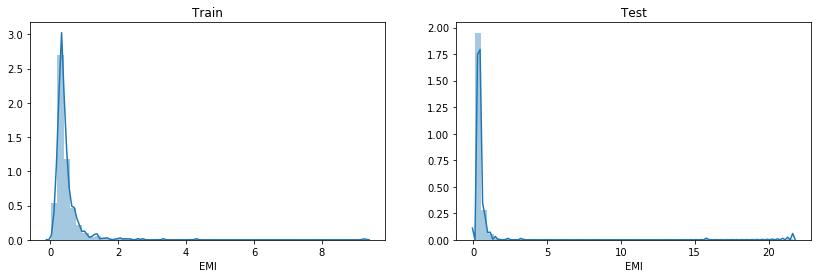

In [91]:
# check the distribution of EMI
# note that EMI is a continuous variable

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['EMI'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['EMI'])
ax1.set_title("Test")

In [92]:
# create new "Balance Income" variable
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000) # Multiply with 1000 to make the units equal (siince EMI is in thousands) 
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)

Text(0.5, 1.0, 'Test')

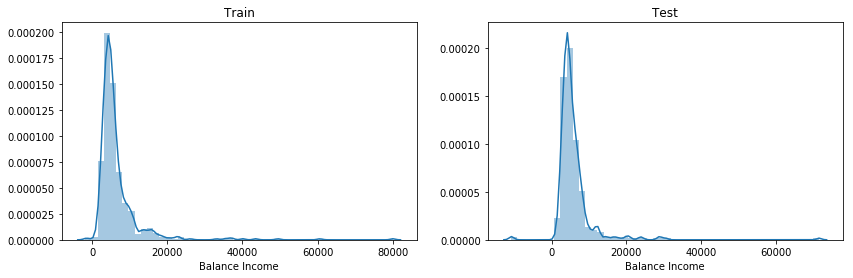

In [93]:
# check the distribution of BalanceIncome
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Balance Income'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Balance Income'])
ax1.set_title("Test")

#### Let us now drop the variables which we used to create these new features.This is because the correlation between those old features and these new features will be very high. This will also reduce the noise in the dataset. We will drop "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term" as they are already represented by "Total Income", "EMI" and "Balance Income".

In [94]:
# before dropping variables
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


In [95]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [96]:
# after dropping variables
train.head()

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,4.852030,0,1,1,0,0,1,0,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,4.852030,0,1,0,1,0,0,1,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,4.189655,0,1,0,1,0,1,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,4.787492,0,1,0,1,0,1,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,4.948760,0,1,1,0,0,1,0,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


## **Model Building II**

In [97]:
# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status                # Save target variable in separate dataset

### **Logistic Regression**

In [98]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(test)

pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.680327868852459

Mean validation accuracy:  0.7246834599493536


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [99]:
# filling Loan_Status with predictions
submission['Loan_Status'] = pred_test

# filling Loan_ID with test Loan_ID
submission['Loan_ID'] = test_original['Loan_ID']

In [100]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [101]:
submission.to_csv('Logistic2.csv', index=False)

#### We got an accuracy of 0.72 on the test data

### **Decision Tree**

In [102]:
from sklearn import tree

#### We will fit the decision tree model using five folds of cross validation

In [103]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836

Mean validation accuracy:  0.7149140343862455


In [104]:
# filling Loan_Status with predictions
submission['Loan_Status'] = pred_test            

# filling Loan_ID with test Loan_ID
submission['Loan_ID'] = test_original['Loan_ID']

In [105]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [106]:
# Converting submission file to .csv format
submission.to_csv('Decision Tree.csv', index=False)

#### Accuracy on test data obtained is 0.645, which is lower than the logistic regression model. We will make some changes to the decision tree model

In [107]:
# We will create a dataframe with columns as various max_depths, compute mean error for each depth,
# and select tree depth which gives lowest error
# the max_depths will range from 2 to 10

mean_accuracy = pd.DataFrame({'2':[0.0,0.0,0.0,0.0,0.0,0.0]})
for i in range(3,11):
    mean_accuracy[str(i)] = [0.0,0.0,0.0,0.0,0.0,0.0]
mean_accuracy

,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### First five rows will have the score for each of the 5 folds, last row will be filled with the mean of the correponding tree max_depth

In [108]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for depth in range(2,11):
    i = 1
    for train_index,test_index in kf.split(X,y):
        xtr,xvl = X.loc[train_index],X.loc[test_index]
        ytr,yvl = y[train_index],y[test_index]
        model = tree.DecisionTreeClassifier(criterion = 'gini', random_state=1,max_depth = depth)
        model.fit(xtr, ytr)
        pred_test = model.predict(xvl)
        score = accuracy_score(yvl,pred_test)
        mean_accuracy[str(depth)][i-1] = score
        i+=1
    
    
    
mean_accuracy

,2,3,4,5,6,7,8,9,10
0,0.829268,0.813008,0.796748,0.788618,0.772358,0.804878,0.780488,0.788618,0.747967
1,0.845528,0.845528,0.845528,0.813008,0.821138,0.756098,0.764228,0.772358,0.764228
2,0.780488,0.780488,0.780488,0.796748,0.804878,0.804878,0.764228,0.788618,0.747967
3,0.788618,0.788618,0.796748,0.772358,0.788618,0.772358,0.780488,0.715447,0.723577
4,0.770492,0.754098,0.762295,0.762295,0.754098,0.745902,0.729508,0.721311,0.729508
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Let's calculate mean and of each column and put it at index 5

In [109]:
for depth in range(2,11):
    mean_accuracy[str(depth)][5] = mean_accuracy[str(depth)].sum()/5
mean_accuracy.loc[5]

2     0.802879
3     0.796348
4     0.796361
5     0.786605
6     0.788218
7     0.776823
8     0.763788
9     0.757270
10    0.742650
Name: 5, dtype: float64

 ####  If we train model with Max_depth 2 or 3, it will underfit on the test data. We can go with either depths 4,5 or 6.

In [110]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1, max_depth = 6, criterion = 'gini')
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7723577235772358

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7540983606557377

Mean validation accuracy:  0.7882180461148873


In [111]:
# filling Loan_Status with predictions
submission['Loan_Status'] = pred_test            

# filling Loan_ID with test Loan_ID
submission['Loan_ID'] = test_original['Loan_ID']

In [112]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [113]:
# Converting submission file to .csv format
submission.to_csv('Decision Tree 2.csv', index=False)

#### Accuracy for max_depth 4 = 0.7431
#### Accuracy for max_depth 5 = 0.7431
#### Accuracy for max_depth 6 = 0.7569

#### On training with these three models, we find that the best accuracy on the test dataset is obtained with max_depth = 6. The accuracy increased from 0.645 to 0.757, by reducing the tree depth. The low accuracy in the previous case was due to overfitting.

### **Random Forests**

In [114]:
# import library
from sklearn.ensemble import RandomForestClassifier

In [115]:
# We will create a dataframe with columns as various max_depths, compute mean error for each depth,
# and select tree depth which gives lowest error
# the max_depths will range from 2 to 14

mean_accuracy = pd.DataFrame({'2':[0.0,0.0,0.0,0.0,0.0,0.0]})
for i in range(3,15):
    mean_accuracy[str(i)] = [0.0,0.0,0.0,0.0,0.0,0.0]
mean_accuracy

,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for depth in range(2,15):
    i = 1
    for train_index,test_index in kf.split(X,y):
        xtr,xvl = X.loc[train_index],X.loc[test_index]
        ytr,yvl = y[train_index],y[test_index]
        
        model = RandomForestClassifier(random_state=1, max_depth=depth, n_estimators=20)
        model.fit(xtr, ytr)
        pred_test = model.predict(xvl)
        score = accuracy_score(yvl,pred_test)
        mean_accuracy[str(depth)][i-1] = score
        i+=1

mean_accuracy


,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.723577,0.788618,0.813008,0.821138,0.821138,0.813008,0.813008,0.804878,0.845528,0.821138,0.804878,0.796748,0.821138
1,0.739837,0.821138,0.821138,0.829268,0.813008,0.780488,0.813008,0.780488,0.813008,0.772358,0.772358,0.813008,0.707317
2,0.723577,0.772358,0.756098,0.780488,0.780488,0.764228,0.772358,0.772358,0.780488,0.764228,0.764228,0.772358,0.796748
3,0.674797,0.723577,0.772358,0.780488,0.764228,0.764228,0.764228,0.788618,0.788618,0.796748,0.780488,0.796748,0.788618
4,0.704918,0.713115,0.745902,0.778689,0.770492,0.762295,0.778689,0.762295,0.778689,0.729508,0.721311,0.745902,0.737705
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [117]:
for depth in range(2,15):
    mean_accuracy[str(depth)][5] = mean_accuracy[str(depth)].sum()/5
mean_accuracy.loc[5]

2     0.713341
3     0.763761
4     0.781701
5     0.798014
6     0.789871
7     0.776849
8     0.788258
9     0.781727
10    0.801266
11    0.776796
12    0.768653
13    0.784953
14    0.770305
Name: 5, dtype: float64

#### We get the best accuracy for max_depth of 10, we will train model using this depth.

In [118]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth = 10, n_estimators=20)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8455284552845529

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7786885245901639

Mean validation accuracy:  0.8012661602025857


In [119]:
# filling Loan_Status with predictions
submission['Loan_Status'] = pred_test            

# filling Loan_ID with test Loan_ID
submission['Loan_ID'] = test_original['Loan_ID']

In [120]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)


In [121]:
# Converting submission file to .csv format
submission.to_csv('Random Forests.csv', index=False)

#### The accuracy on test set was 0.7986. This model had a significant improvement over the decision trees model.

 #### **GridSearchCV**
 #### We will implement GridSearchCV and tune the hyperparameters to improve the accuracy of the model. We will use grid search to get the optimized values of hyper parameters. GridSearch is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

In [122]:
# import library
from sklearn.model_selection import GridSearchCV

In [123]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 16, 1)), 'n_estimators': list(range(5, 150, 5))}

In [124]:
# default 3-fold cross validation, cv=3
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [125]:
# split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)

In [126]:
# fit the grid search model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [127]:
# estimate the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=55,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

#### So, the optimized value for the max_depth variable is 9 and for n_estimator is 55. Now let’s build the model using these optimized values.

In [128]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=41)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7868852459016393

Mean validation accuracy:  0.8012794882047182


In [129]:
# filling Loan_Status with predictions
submission['Loan_Status']=pred_test            

# filling Loan_ID with test Loan_ID
submission['Loan_ID']=test_original['Loan_ID']

In [130]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [131]:
# Converting submission file to .csv format
submission.to_csv('Random Forests.csv', index=False)

#### This model yielded an accuracy of 0.778 on the test set

### **k Nearest Neighbors **

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
# We will create a dataframe with columns as various n_neighbors, compute mean error for each k,
# and select k which gives lowest error
# the values of k will range from 2 to 14

mean_accuracy = pd.DataFrame({'3':[0.0,0.0,0.0,0.0,0.0,0.0]})
for i in range(5,27,2):
    mean_accuracy[str(i)] = [0.0,0.0,0.0,0.0,0.0,0.0]
mean_accuracy

,3,5,7,9,11,13,15,17,19,21,23,25
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for k in range(3,27,2):
    i = 1
    for train_index,test_index in kf.split(X,y):
        xtr,xvl = X.loc[train_index],X.loc[test_index]
        ytr,yvl = y[train_index],y[test_index]
        
        model = KNeighborsClassifier(n_neighbors = k)
        model.fit(xtr, ytr)
        pred_test = model.predict(xvl)
        score = accuracy_score(yvl,pred_test)
        mean_accuracy[str(k)][i-1] = score
        i+=1

mean_accuracy



,3,5,7,9,11,13,15,17,19,21,23,25
0,0.626016,0.658537,0.658537,0.691057,0.699187,0.707317,0.699187,0.707317,0.715447,0.691057,0.691057,0.691057
1,0.593496,0.601626,0.601626,0.617886,0.626016,0.658537,0.691057,0.658537,0.658537,0.699187,0.707317,0.707317
2,0.593496,0.626016,0.658537,0.642276,0.650407,0.674797,0.682927,0.674797,0.691057,0.707317,0.682927,0.699187
3,0.552846,0.626016,0.617886,0.666667,0.666667,0.642276,0.666667,0.666667,0.674797,0.674797,0.658537,0.658537
4,0.614754,0.614754,0.622951,0.614754,0.647541,0.672131,0.680328,0.688525,0.688525,0.688525,0.696721,0.696721
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [135]:
for k in range(3,27,2):
    mean_accuracy[str(k)][5] = mean_accuracy[str(k)].sum()/5
mean_accuracy.loc[5]

3     0.596122
5     0.625390
7     0.631907
9     0.646528
11    0.657963
13    0.671012
15    0.684033
17    0.679168
19    0.685672
21    0.692176
23    0.687312
25    0.690564
Name: 5, dtype: float64

#### The best value of k we get is 21. Let's use this value to train our model

In [136]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = KNeighborsClassifier(n_neighbors = 21)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.6910569105691057

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7073170731707317

4 of kfold 5
accuracy_score 0.6747967479674797

5 of kfold 5
accuracy_score 0.6885245901639344

Mean validation accuracy:  0.6921764627482341


In [137]:
# filling Loan_Status with predictions
submission['Loan_Status']=pred_test            

# filling Loan_ID with test Loan_ID
submission['Loan_ID']=test_original['Loan_ID']

In [138]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [139]:
# Converting submission file to .csv format
submission.to_csv('k Nearest Neighbors.csv', index=False)

#### We got an accuracy of 0.70 on the test dataset by using the k nearest neighbors model

### **GBM Boosting**

#### We will use boosting to increase the accuracy of our model. We will be using Gradient Boosting (GBM).

In [140]:
# import libraries
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import GridSearchCV   #Performing grid search

#### We will take the following approach in choosing the parameters for the GB model. We will later tune the hyperparameters using GridSearchCV.
* learning_rate - We will choose the default value of 0.1
* min_samples_split - This should be ~0.5-1% of total values. We will take it as 30.
* min_samples_leaf - We will take it intuitively as 30
* max_depth - Generally taken between 4-10. We will go along with 8
* max_features - We will take it as square root of total number of features
* subsample - 0.8 is commonly used 
* random_state - Chosen as 1 in order to maintain consistency in readings

In [141]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = GradientBoostingClassifier(learning_rate=0.1, min_samples_split = 30, min_samples_leaf=30, 
                                       max_depth=8, max_features='sqrt',subsample=0.8,random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)



1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8048780487804879

3 of kfold 5
accuracy_score 0.8130081300813008

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7868852459016393

Mean validation accuracy:  0.8029055044648807


#### We will use GridSearchCV to tune the parameters n_estimators first

In [142]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
param_test1 = {'n_estimators':range(20,101,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=30, min_samples_leaf=30, 
                                                               max_depth=8,max_features='sqrt',subsample=0.8,
                                                               random_state=1), 
param_grid = param_test1, scoring='accuracy')

In [143]:
# split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)
# fit the grid search model
gsearch1.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=30,
                                                  min_samples_split=30,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
  

In [144]:
# estimate the optimized value
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 80}, 0.8041313269493843)

#### The optimal value of n_estimators is 80. It is a reasonable value. 
#### Now, let's tune the tree specific parameters. Since, max_depth and min_samples_split have higher impact compared to max_features and min_samples_leaf, we'll tune those parameters first. To start with, we will test max_depth values of 5 to 15 and min_samples_split from 5 to 75 in steps of 5.These ranges are based on intuition.


#### **Max_depth and min_samples_split**

In [145]:
param_test2 = {'max_depth':range(5,16), 'min_samples_split':range(5,76,5)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               n_estimators = 80, max_features='sqrt',subsample=0.8,
                                                               random_state=1), 
param_grid = param_test2, scoring='accuracy')

In [146]:
#split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)
# fit the grid search model
gsearch2.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=80,
                                                  n_iter_no_change=None,
     

In [147]:
# estimate the optimized value
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 5, 'min_samples_split': 75}, 0.8088645690834474)

#### Optimum value of max_depth is 5, and that of min_samples_split is 75. Since the optimum value of min_samples_split fell just on the boundary of the range, we will tune min_samples_split again, while taking a larger range

#### **min_samples_leaf**
#### We can test for values of min_samples_leaf, from 5 to 50, in steps of 5. We will tune min_samples_split again, expanding the range from 5 to 100, in intervals of 5.

In [148]:
param_test3 = {'min_samples_split':range(5,101,5),'min_samples_leaf':range(5,51,5)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_depth=5, 
                                                               max_features='sqrt',  
                                                               subsample=0.8, random_state=1), 
param_grid = param_test3, scoring='accuracy')

In [149]:
#split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)
# fit the grid search model
gsearch3.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=5,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=80,
                                                  n_iter_no_change=None,
     

In [150]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 25, 'min_samples_split': 85}, 0.818112175102599)

#### Optimum value of min_samples_leaf = 25, value of min_samples_split = 85

 #### **max_features**
 #### We will try values from 4 to 15.

In [151]:
param_test4 = {'max_features':range(4,16)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=5, 
                                                               min_samples_split=85, min_samples_leaf=25, 
                                                               subsample=0.8, random_state=1),
param_grid = param_test4, scoring='accuracy')

In [152]:
#split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)
# fit the grid search model
gsearch4.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=5,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=25,
                                                  min_samples_split=85,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=80,
                                                  n_iter_no_change=None,
     

In [153]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 4}, 0.818112175102599)

#### We get max_feature = 4.
#### Final tree parameters :
* min_samples_split: 85
* min_samples_leaf: 25
* max_depth: 5
* max_features: 4

#### **subsample**

In [154]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=5, 
                                                               min_samples_split=85, min_samples_leaf=25, 
                                                               random_state=1, max_features = 4),
param_grid = param_test5, scoring='accuracy')

In [155]:
#split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)
# fit the grid search model
gsearch5.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=5,
                                                  max_features=4,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=25,
                                                  min_samples_split=85,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=80,
                                                  n_iter_no_change=None,
        

In [156]:
gsearch5.best_params_, gsearch5.best_score_

({'subsample': 0.8}, 0.818112175102599)

#### subsample = 0.8. We have all the needed parameters. We will train using these newly obtained parameters.

In [157]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=5, subsample = 0.8, 
                                       min_samples_split=85, min_samples_leaf=25, 
                                       random_state=1, max_features = 4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7704918032786885

Mean validation accuracy:  0.798000799680128


#### Mean validation accuracy obtained = 0.798. Let us now halve the learning rate to 0.05, and double the number of trees to 160

In [158]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = GradientBoostingClassifier(learning_rate=0.05, n_estimators = 160,max_depth=5, subsample = 0.8, 
                                       min_samples_split=85, min_samples_leaf=25, 
                                       random_state=1, max_features = 4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7786885245901639

Mean validation accuracy:  0.8045181927229107


#### Mean validation accuracy =  0.8045. Let us reduce learning rate by 1/10, i.e to 0.01, and increase number of trees ten times, i.e. to 800.

In [159]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = GradientBoostingClassifier(learning_rate=0.01, n_estimators = 800,max_depth=5, subsample = 0.8, 
                                       min_samples_split=85, min_samples_leaf=25, 
                                       random_state=1, max_features = 4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7786885245901639

Mean validation accuracy:  0.8045181927229107


#### Mean validation accuracy = 0.8045, it did not change. Let us reduce learning rate to 1/20, i.e to 0.005, and increase number of trees 20 times, i.e. to 1600.







In [160]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = GradientBoostingClassifier(learning_rate=0.005, n_estimators = 1600,max_depth=5, subsample = 0.8, 
                                       min_samples_split=85, min_samples_leaf=25, 
                                       random_state=1, max_features = 4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7786885245901639

Mean validation accuracy:  0.8061442089830735


#### Mean validation accuracy increased to 0.8061. Let us keep learning_rate constant, and increase number of trees to 2000.

In [161]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = GradientBoostingClassifier(learning_rate=0.005, n_estimators = 2000,max_depth=5, subsample = 0.8, 
                                       min_samples_split=85, min_samples_leaf=25, 
                                       random_state=1, max_features = 4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.8130081300813008

4 of kfold 5
accuracy_score 0.8211382113821138

5 of kfold 5
accuracy_score 0.7786885245901639

Mean validation accuracy:  0.8093962415033987


#### Mean validation accuracy increased to 0.8094. On increasing n_estimators further, and decreasing learning_rate, we find no significant difference in accuracy, as shown below. Moreover, it is computationaly more expensive to increase number of trees.

In [162]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model_ = GradientBoostingClassifier(learning_rate=0.0025, n_estimators = 4000,max_depth=5, subsample = 0.8, 
                                       min_samples_split=85, min_samples_leaf=25, 
                                       random_state=1, max_features = 4)
    model_.fit(xtr, ytr)
    pred_test_ = model_.predict(xvl)
    score = accuracy_score(yvl,pred_test_)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.8130081300813008

4 of kfold 5
accuracy_score 0.8211382113821138

5 of kfold 5
accuracy_score 0.7786885245901639

Mean validation accuracy:  0.8093962415033987


In [163]:
# filling Loan_Status with predictions
submission['Loan_Status'] = pred_test            

# filling Loan_ID with test Loan_ID
submission['Loan_ID']=test_original['Loan_ID']

In [164]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [165]:
# Converting submission file to .csv format
submission.to_csv('GBoost.csv', index=False)

#### We got an score of 0.771 on the test dataset.

#### We used the models - Logistic Regression, Decision Trees, Random Forests, and k Nearest Neighbors to train the dataset. We also applied Gradient Boosting. The best accuracy obtained (on the public leaderboard) was 0.798 (Random Forests), followed by Logistic Regression (0.778), Gradient Boosting (0.770) and Decision Trees (0.757). K Nearest Neighbors performed the worst with an accuracy of 0.701.